In [120]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from catboost import CatBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import NearMiss, CondensedNearestNeighbour, TomekLinks
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, auc, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('./Data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: >

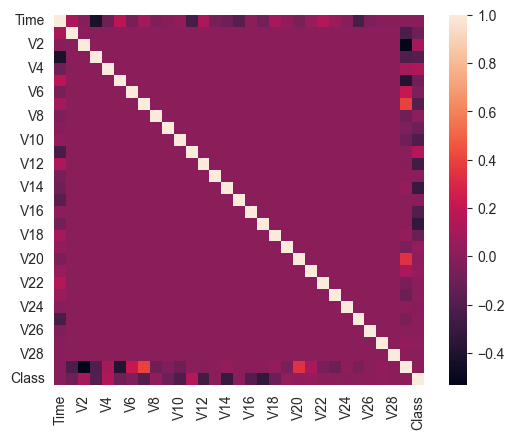

In [7]:
sns.heatmap(data.corr(), square=True)

In [8]:
data.Class.value_counts(normalize=False)

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
    X = data.drop(columns=['Class', 'Time'], axis=1)
y = data.Class

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

### Обычные обучающие модели

In [11]:
lr_pipe = Pipeline(
    steps=[('ss', StandardScaler()),
           # ('pc', PCA(n_components=5)),
           ('lr', LogisticRegression(max_iter=10000))])
# param_grid = {"lr__C": [-1, 1],    ---- очень долго считается и сложно подобрать параметры
#               "lr__penalty": ["elasticnet"],
#               "lr__solver": ["saga"],
#               "lr__l1_ratio": [0.5]}
param_grid = {}
lr_gs = GridSearchCV(estimator=lr_pipe, param_grid=param_grid, cv=5,
                     n_jobs=-1, scoring='f1', verbose=1)

In [12]:
lr_pipe_pc = Pipeline(
    steps=[('ss', StandardScaler()),
           ('pc', PCA(n_components=5)),
           ('lr', LogisticRegression(max_iter=10000))])
# param_grid = {"lr__C": [-1, 1],    ---- очень долго считается и сложно подобрать параметры
#               "lr__penalty": ["elasticnet"],
#               "lr__solver": ["saga"],
#               "lr__l1_ratio": [0.5]}
param_grid = {}
lr_pc_gs = GridSearchCV(estimator=lr_pipe_pc, param_grid=param_grid, cv=5,
                        n_jobs=-1, scoring='f1', verbose=1)

In [13]:
# catboost

### No sampling

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.58      0.68       148

    accuracy                           1.00     85443
   macro avg       0.91      0.79      0.84     85443
weighted avg       1.00      1.00      1.00     85443


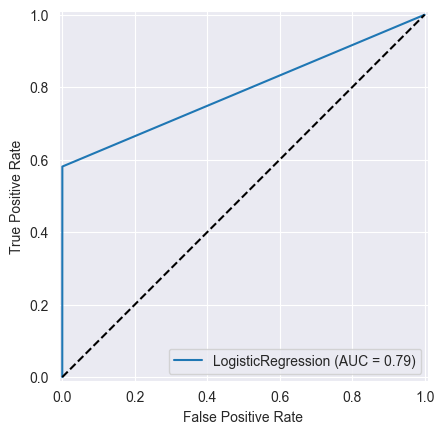

In [14]:
lr_gs.fit(X_train, y_train)
print(classification_report(y_test, lr_gs.predict(X_test)))

fpr, tpr, _ = roc_curve(y_test, lr_gs.best_estimator_.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='LogisticRegression', roc_auc=auc(fpr, tpr)).plot()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot([0, 1], [0, 1], 'k--')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.58      0.68       148

    accuracy                           1.00     85443
   macro avg       0.91      0.79      0.84     85443
weighted avg       1.00      1.00      1.00     85443


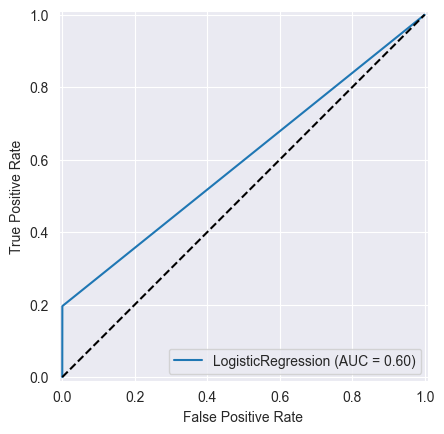

In [15]:
lr_pc_gs.fit(X_train, y_train)
print(classification_report(y_test, lr_gs.predict(X_test)))

fpr, tpr, _ = roc_curve(y_test, lr_pc_gs.best_estimator_.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='LogisticRegression', roc_auc=auc(fpr, tpr)).plot()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot([0, 1], [0, 1], 'k--')

### Under-sampling

### NearMiss

**NearMiss-1** selects examples from the majority class that have the smallest average distance to the three closest examples from the minority class. **NearMiss-2** selects examples from the majority class that have the smallest average distance to the three furthest examples from the minority class. **NearMiss-3** involves selecting a given number of majority class examples for each example in the minority class that are closest


**Selects Examples to Keep**

In [16]:
# param_grid = {'version': [1, 2, 3], 'n_neighbors': [3, 4, 5]}
nm1 = NearMiss(version=1, n_neighbors=3, n_jobs=-1, sampling_strategy='not minority')
X_train_nm1, y_train_nm1 = nm1.fit_resample(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       1.00      0.28      0.44     85295
           1       0.00      0.97      0.00       148

    accuracy                           0.28     85443
   macro avg       0.50      0.62      0.22     85443
weighted avg       1.00      0.28      0.44     85443


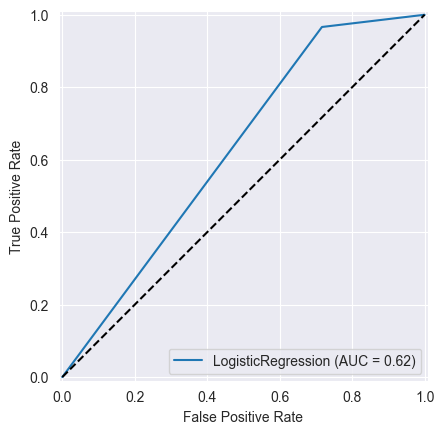

In [17]:
lr_gs.fit(X_train_nm1, y_train_nm1)
print(classification_report(y_test, lr_gs.predict(X_test)))

fpr, tpr, _ = roc_curve(y_test, lr_gs.best_estimator_.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='LogisticRegression', roc_auc=auc(fpr, tpr)).plot()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot([0, 1], [0, 1], 'k--')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       1.00      0.52      0.68     85295
           1       0.00      0.93      0.01       148

    accuracy                           0.52     85443
   macro avg       0.50      0.72      0.35     85443
weighted avg       1.00      0.52      0.68     85443


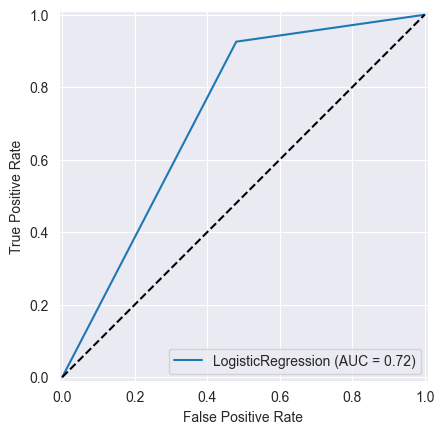

In [18]:
lr_pc_gs.fit(X_train_nm1, y_train_nm1)
print(classification_report(y_test, lr_pc_gs.predict(X_test)))

fpr, tpr, _ = roc_curve(y_test, lr_pc_gs.best_estimator_.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='LogisticRegression', roc_auc=auc(fpr, tpr)).plot()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot([0, 1], [0, 1], 'k--')

In [19]:
nm2 = NearMiss(version=2, n_neighbors=3, n_jobs=-1, sampling_strategy='not minority')
X_train_nm2, y_train_nm2 = nm2.fit_resample(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       1.00      0.10      0.17     85295
           1       0.00      0.97      0.00       148

    accuracy                           0.10     85443
   macro avg       0.50      0.53      0.09     85443
weighted avg       1.00      0.10      0.17     85443


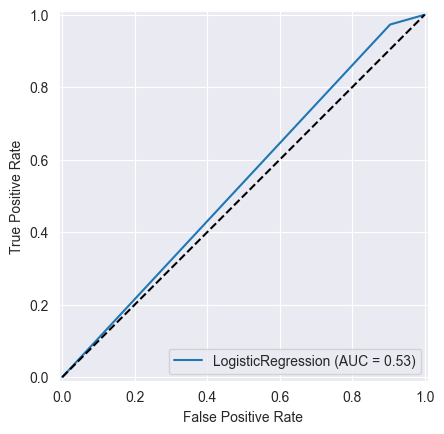

In [20]:
lr_gs.fit(X_train_nm2, y_train_nm1)
print(classification_report(y_test, lr_gs.predict(X_test)))

fpr, tpr, _ = roc_curve(y_test, lr_gs.best_estimator_.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='LogisticRegression', roc_auc=auc(fpr, tpr)).plot()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot([0, 1], [0, 1], 'k--')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     85295
           1       0.00      0.95      0.01       148

    accuracy                           0.43     85443
   macro avg       0.50      0.69      0.30     85443
weighted avg       1.00      0.43      0.60     85443


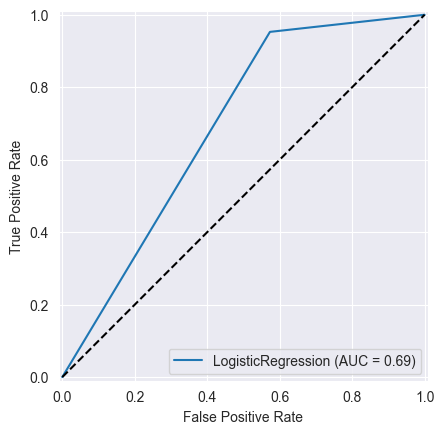

In [21]:
lr_pc_gs.fit(X_train_nm2, y_train_nm1)
print(classification_report(y_test, lr_pc_gs.predict(X_test)))

fpr, tpr, _ = roc_curve(y_test, lr_pc_gs.best_estimator_.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='LogisticRegression', roc_auc=auc(fpr, tpr)).plot()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot([0, 1], [0, 1], 'k--')

In [22]:
nm3 = NearMiss(version=3, n_neighbors_ver3=3, n_jobs=-1, sampling_strategy='not minority')
X_train_nm3, y_train_nm3 = nm2.fit_resample(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       1.00      0.10      0.17     85295
           1       0.00      0.97      0.00       148

    accuracy                           0.10     85443
   macro avg       0.50      0.53      0.09     85443
weighted avg       1.00      0.10      0.17     85443


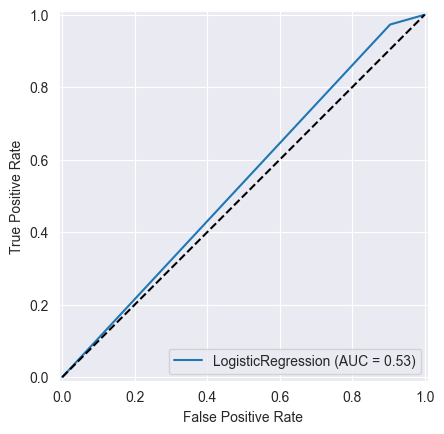

In [23]:
lr_gs.fit(X_train_nm3, y_train_nm1)
print(classification_report(y_test, lr_gs.predict(X_test)))

fpr, tpr, _ = roc_curve(y_test, lr_gs.best_estimator_.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='LogisticRegression', roc_auc=auc(fpr, tpr)).plot()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot([0, 1], [0, 1], 'k--')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     85295
           1       0.00      0.95      0.01       148

    accuracy                           0.43     85443
   macro avg       0.50      0.69      0.30     85443
weighted avg       1.00      0.43      0.60     85443


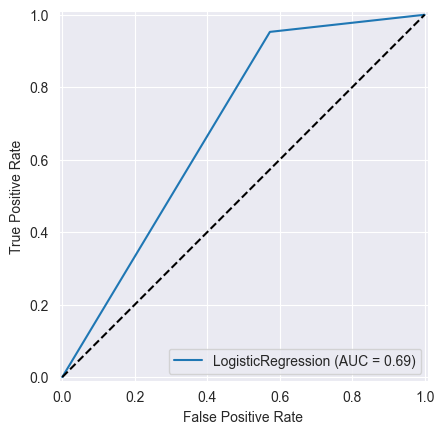

In [24]:
lr_pc_gs.fit(X_train_nm3, y_train_nm1)
print(classification_report(y_test, lr_pc_gs.predict(X_test)))

fpr, tpr, _ = roc_curve(y_test, lr_pc_gs.best_estimator_.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='LogisticRegression', roc_auc=auc(fpr, tpr)).plot()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot([0, 1], [0, 1], 'k--')

### CNN

[Condensed Nearest Neighbors](https://www.youtube.com/watch?v=H7f_J4HjlWE/), or CNN for short, is an undersampling technique that seeks a subset of a collection of samples that results in no loss in model performance, referred to as a minimal consistent set.  

It is achieved by enumerating the examples in the dataset and adding them to the “store” only if they cannot be classified correctly by the current contents of the store. This approach was proposed to reduce the memory requirements for the k-Nearest Neighbors (KNN) algorithm  

During the procedure, the KNN algorithm is used to classify points to determine if they are to be added to the store or not. The k value is set via the n_neighbors argument and defaults to 1.

**Selects Examples to Keep**    

In [25]:
cnn = CondensedNearestNeighbour(n_neighbors=1, sampling_strategy='not minority', n_jobs=-1)
X_train_cnn, y_train_cnn = cnn.fit_resample(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.73      0.79      0.76       148

    accuracy                           1.00     85443
   macro avg       0.87      0.90      0.88     85443
weighted avg       1.00      1.00      1.00     85443


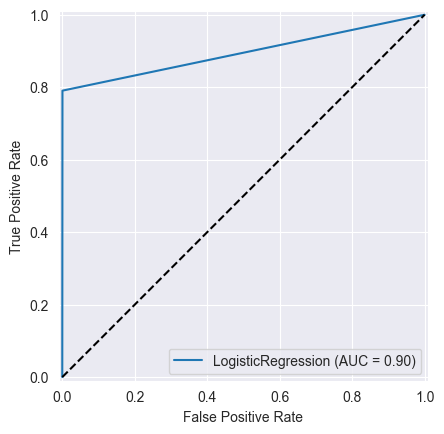

In [26]:
lr_gs.fit(X_train_cnn, y_train_cnn)
print(classification_report(y_test, lr_gs.predict(X_test)))

fpr, tpr, _ = roc_curve(y_test, lr_gs.best_estimator_.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='LogisticRegression', roc_auc=auc(fpr, tpr)).plot()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot([0, 1], [0, 1], 'k--')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.75      0.77      0.76       148

    accuracy                           1.00     85443
   macro avg       0.87      0.88      0.88     85443
weighted avg       1.00      1.00      1.00     85443


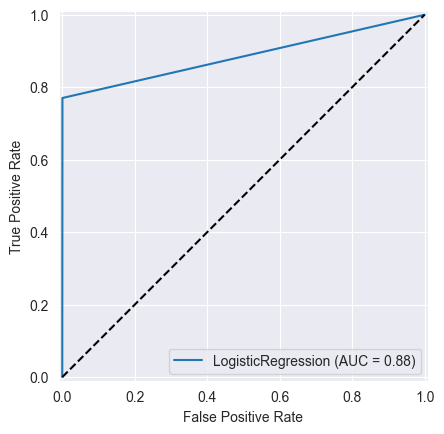

In [27]:
lr_pc_gs.fit(X_train_cnn, y_train_cnn)
print(classification_report(y_test, lr_pc_gs.predict(X_test)))

fpr, tpr, _ = roc_curve(y_test, lr_pc_gs.best_estimator_.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='LogisticRegression', roc_auc=auc(fpr, tpr)).plot()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot([0, 1], [0, 1], 'k--')

### TomekLinks

A Tomek’s link exists when two samples from different classes are closest neighbors to each other.
TomekLinks detects and removes Tomek’s links. 

When TomekLinks finds a Tomek’s link, it can either remove the sample of the majority class, or both. The parameter sampling_strategy controls which samples from the link will be removed. By default (i.e., sampling_strategy='auto'), it will remove the sample from the majority class. Both samples, that is that from the majority and the one from the minority class, can be removed by setting sampling_strategy to 'all'.

In [28]:
tl = TomekLinks(sampling_strategy='not minority', n_jobs=-1)
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.59      0.69       148

    accuracy                           1.00     85443
   macro avg       0.91      0.79      0.84     85443
weighted avg       1.00      1.00      1.00     85443


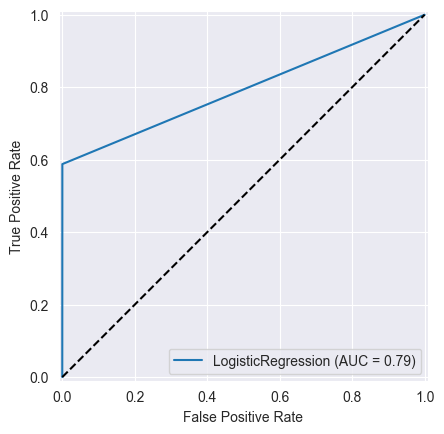

In [29]:
lr_gs.fit(X_train_tl, y_train_tl)
print(classification_report(y_test, lr_gs.predict(X_test)))

fpr, tpr, _ = roc_curve(y_test, lr_gs.best_estimator_.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='LogisticRegression', roc_auc=auc(fpr, tpr)).plot()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot([0, 1], [0, 1], 'k--')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.09      0.01      0.01       148

    accuracy                           1.00     85443
   macro avg       0.54      0.50      0.51     85443
weighted avg       1.00      1.00      1.00     85443


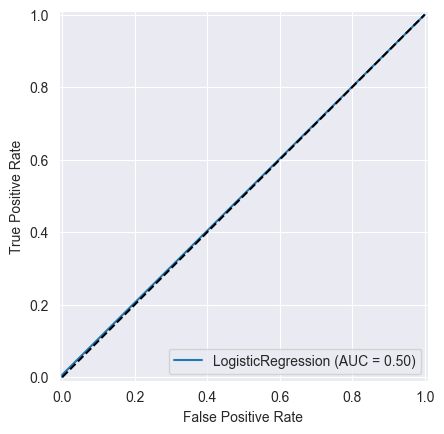

In [30]:
lr_pc_gs.fit(X_train_tl, y_train_tl)
print(classification_report(y_test, lr_pc_gs.predict(X_test)))

fpr, tpr, _ = roc_curve(y_test, lr_pc_gs.best_estimator_.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='LogisticRegression', roc_auc=auc(fpr, tpr)).plot()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot([0, 1], [0, 1], 'k--')

### Over-sampling

#### SMOTE ADASYN

![](https://hsto.org/getpro/habr/post_images/c57/e7e/f4f/c57e7ef4f8711ad2eda881651a027867.png)

Эта стратегия основана на идее генерации некоторого количества искусственных примеров, которые были бы «похожи» на имеющиеся в миноритарном классе, но при этом не дублировали их. Для создания новой записи находят разность $$d = X_b – X_a$$, где $X_a$,$X_b$ – векторы признаков «соседних» примеров $a$ и $b$ из миноритарного класса. Их находят, используя алгоритм ближайшего соседа (KNN). В данном случае необходимо и достаточно для примера $b$ получить набор из $k$ соседей, из которого в дальнейшем будет выбрана запись $b$. Остальные шаги алгоритма KNN не требуются.

Далее из $d$ путем умножения каждого его элемента на случайное число в интервале (0, 1) получают $\widehat{d}$. Вектор признаков нового примера вычисляется путем сложения $X_a$ и $\widehat{d}$. Алгоритм SMOTE позволяет задавать количество записей, которое необходимо искусственно сгенерировать. Степень сходства примеров $a$ и $b$ можно регулировать путем изменения значения $k$ (числа ближайших соседей). На рисунке схематично изображено то, как в двумерном пространстве признаков могут располагаться искусственно сгенерированные примеры.

![dssmall](https://basegroup.ru/sites/default/files/article_img/smote.gif)

Данный подход имеет недостаток в том, что «вслепую» увеличивает плотность примерами в области слабо представленного класса. В случае, если миноритарные примеры равномерно распределены среди мажоритарных и имеют низкую плотность, алгоритм SMOTE только сильнее перемешает классы.

![dssmall](https://basegroup.ru/sites/default/files/article_img/smote_overgeneralization.gif)

In [31]:
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.08      0.93      0.15       148

    accuracy                           0.98     85443
   macro avg       0.54      0.96      0.57     85443
weighted avg       1.00      0.98      0.99     85443


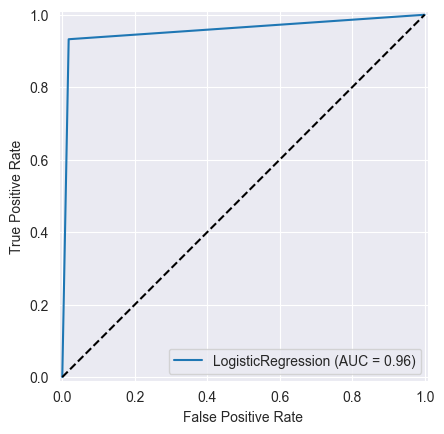

In [32]:
lr_gs.fit(X_train_sm, y_train_sm)
print(classification_report(y_test, lr_gs.predict(X_test)))

fpr, tpr, _ = roc_curve(y_test, lr_gs.best_estimator_.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='LogisticRegression', roc_auc=auc(fpr, tpr)).plot()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot([0, 1], [0, 1], 'k--')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.09      0.84      0.16       148

    accuracy                           0.98     85443
   macro avg       0.54      0.91      0.57     85443
weighted avg       1.00      0.98      0.99     85443


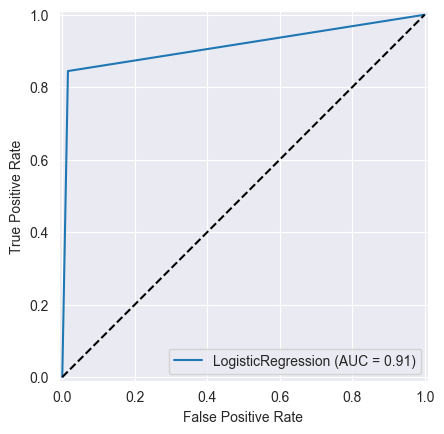

In [33]:
lr_pc_gs.fit(X_train_sm, y_train_sm)
print(classification_report(y_test, lr_pc_gs.predict(X_test)))

fpr, tpr, _ = roc_curve(y_test, lr_pc_gs.best_estimator_.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='LogisticRegression', roc_auc=auc(fpr, tpr)).plot()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot([0, 1], [0, 1], 'k--')

In [34]:
ad = ADASYN()  # SMOTE + погрешность вне прямой между точками
X_train_ad, y_train_ad = ad.fit_resample(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85295
           1       0.03      0.94      0.06       148

    accuracy                           0.95     85443
   macro avg       0.52      0.94      0.52     85443
weighted avg       1.00      0.95      0.97     85443


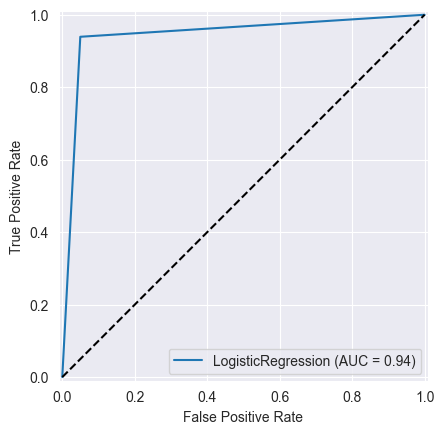

In [35]:
lr_gs.fit(X_train_ad, y_train_ad)
print(classification_report(y_test, lr_gs.predict(X_test)))

fpr, tpr, _ = roc_curve(y_test, lr_gs.best_estimator_.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='LogisticRegression', roc_auc=auc(fpr, tpr)).plot()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot([0, 1], [0, 1], 'k--')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     85295
           1       0.03      0.91      0.06       148

    accuracy                           0.95     85443
   macro avg       0.52      0.93      0.52     85443
weighted avg       1.00      0.95      0.97     85443


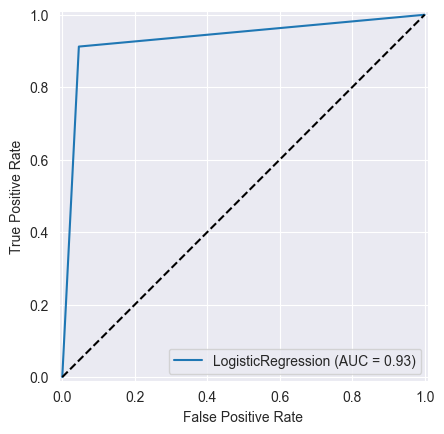

In [36]:
lr_pc_gs.fit(X_train_ad, y_train_ad)
print(classification_report(y_test, lr_pc_gs.predict(X_test)))

fpr, tpr, _ = roc_curve(y_test, lr_pc_gs.best_estimator_.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='LogisticRegression', roc_auc=auc(fpr, tpr)).plot()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot([0, 1], [0, 1], 'k--')

### BalancedRandomForestClassifier

A [balanced random forest](https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/) differs from a classical random forest by the fact that it will draw a bootstrap sample from the minority class and sample with replacement the same number of samples from the majority class.

In [96]:
brfc_pipe = Pipeline(
    steps=[('ss', StandardScaler()),
           # ('pc', PCA(n_components=5)),
           ('brf', BalancedRandomForestClassifier(sampling_strategy='not minority', replacement=True, bootstrap=True))])

param_grid = {'brf__max_depth': [1], 'brf__min_samples_leaf': [15],
              'brf__min_samples_split': [130]}
brfc_gs = GridSearchCV(estimator=brfc_pipe, param_grid=param_grid, cv=5,
                       n_jobs=-1, scoring='f1')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.46      0.82      0.59       148

    accuracy                           1.00     85443
   macro avg       0.73      0.91      0.80     85443
weighted avg       1.00      1.00      1.00     85443

[0.01 0.01 0.01 0.11 0.01 0.01 0.04 0.   0.04 0.11 0.1  0.1  0.   0.16
 0.   0.09 0.12 0.03 0.01 0.   0.01 0.   0.   0.   0.   0.   0.03 0.
 0.  ]


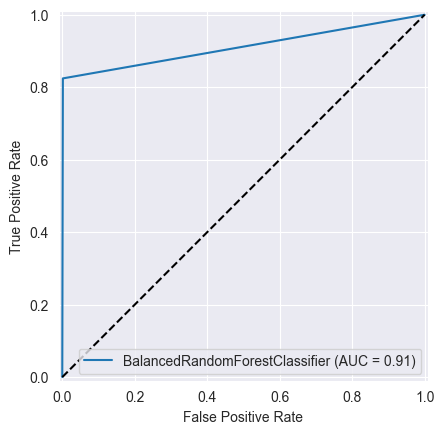

In [97]:
brfc_gs.fit(X_test, y_test)
print(classification_report(y_test, brfc_gs.predict(X_test)))
print(brfc_gs.best_estimator_.named_steps['brf'].feature_importances_)

fpr, tpr, _ = roc_curve(y_test, brfc_gs.best_estimator_.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='BalancedRandomForestClassifier',
                roc_auc=auc(fpr, tpr)).plot()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot([0, 1], [0, 1], 'k--')

### Catboost

CatBoost — библиотека для градиентного бустинга, главным преимуществом которой является то, что она одинаково хорошо работает «из коробки» как с числовыми признаками, так и с категориальными. Программное обеспечение разработано по методологии SCRUM.

In [115]:
cb_pipe = Pipeline(
    steps=[('ss', StandardScaler()),
           # ('pc', PCA(n_components=5)), очень ухудшает
           ('cb', CatBoostClassifier())])

Learning rate set to 0.098829
0:	learn: 0.3972453	total: 21.4ms	remaining: 21.4s
1:	learn: 0.2070780	total: 41.9ms	remaining: 20.9s
2:	learn: 0.1153437	total: 62.3ms	remaining: 20.7s
3:	learn: 0.0649471	total: 84.6ms	remaining: 21.1s
4:	learn: 0.0386258	total: 145ms	remaining: 28.9s
5:	learn: 0.0247377	total: 192ms	remaining: 31.9s
6:	learn: 0.0161377	total: 215ms	remaining: 30.5s
7:	learn: 0.0112505	total: 238ms	remaining: 29.5s
8:	learn: 0.0085421	total: 259ms	remaining: 28.5s
9:	learn: 0.0066413	total: 278ms	remaining: 27.6s
10:	learn: 0.0055093	total: 306ms	remaining: 27.5s
11:	learn: 0.0047368	total: 327ms	remaining: 26.9s
12:	learn: 0.0041423	total: 350ms	remaining: 26.6s
13:	learn: 0.0037141	total: 370ms	remaining: 26s
14:	learn: 0.0034517	total: 387ms	remaining: 25.4s
15:	learn: 0.0032305	total: 409ms	remaining: 25.1s
16:	learn: 0.0030671	total: 426ms	remaining: 24.6s
17:	learn: 0.0029453	total: 447ms	remaining: 24.4s
18:	learn: 0.0028398	total: 465ms	remaining: 24s
19:	learn: 

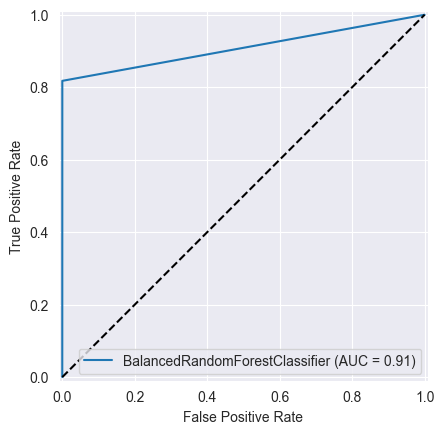

In [116]:
cb_pipe.fit(X_train, y_train)
print(classification_report(y_test, cb_pipe.predict(X_test)))
print(cb_pipe.named_steps['cb'].feature_importances_)

fpr, tpr, _ = roc_curve(y_test, cb_pipe.predict(X_test))
RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='BalancedRandomForestClassifier',
                roc_auc=auc(fpr, tpr)).plot()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.plot([0, 1], [0, 1], 'k--')

Learning rate set to 0.039142
0:	learn: 0.5673998	total: 10.1ms	remaining: 10.1s
1:	learn: 0.4634293	total: 20.9ms	remaining: 10.5s
2:	learn: 0.3838575	total: 29ms	remaining: 9.65s
3:	learn: 0.3102513	total: 37.8ms	remaining: 9.41s
4:	learn: 0.2605404	total: 47.2ms	remaining: 9.4s
5:	learn: 0.2133289	total: 54.9ms	remaining: 9.1s
6:	learn: 0.1736817	total: 63.1ms	remaining: 8.94s
7:	learn: 0.1434030	total: 71.5ms	remaining: 8.86s
8:	learn: 0.1182145	total: 80.3ms	remaining: 8.84s
9:	learn: 0.0990742	total: 88.7ms	remaining: 8.78s
10:	learn: 0.0831308	total: 96.6ms	remaining: 8.69s
11:	learn: 0.0697471	total: 105ms	remaining: 8.65s
12:	learn: 0.0595822	total: 113ms	remaining: 8.6s
13:	learn: 0.0508275	total: 121ms	remaining: 8.53s
14:	learn: 0.0433785	total: 129ms	remaining: 8.47s
15:	learn: 0.0371900	total: 140ms	remaining: 8.61s
16:	learn: 0.0324382	total: 149ms	remaining: 8.62s
17:	learn: 0.0283099	total: 158ms	remaining: 8.59s
18:	learn: 0.0248544	total: 167ms	remaining: 8.61s
19:	l

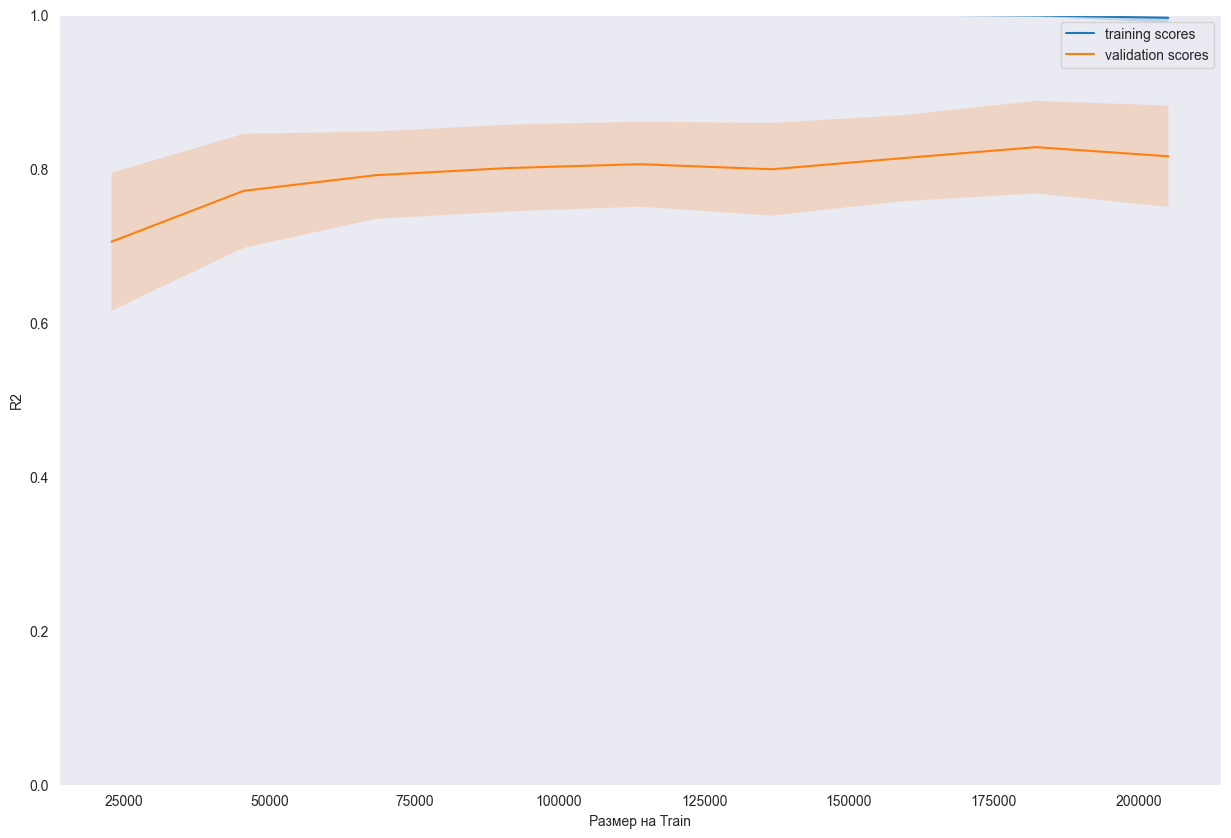

In [121]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)


N_train, val_train, val_test = learning_curve(cb_pipe, X, y,
                                              train_sizes=np.linspace(0.1, 0.9, 9),
                                              cv=5, scoring='f1')

plt.figure(figsize=(15, 10))
plt.grid()
plt.ylim(0, 1.1)
plot_with_err(N_train, val_train, label='training scores')
plot_with_err(N_train, val_test, label='validation scores')
plt.xlabel('Размер на Train')
plt.ylabel('R2')
plt.legend()